<h1><center><span style="color:purple">Working with pandas!</center></h1>

![Pandas for Data Analysis and their Benefits | by Asirinaidu P | Medium](https://miro.medium.com/max/748/1*wP8ubuQEIrtxtfd-DTOTig.jpeg)

<h1><center><span style="color:purple">pandas pandas pandas</center></h1>

<h1><center><span style="color:purple">A Background on pandas</center></h1>

**pandas was first developed by Wes McKinney in 2008 while he worked for a hedge fund. Wes saw how cumbersome data analysis was in programs such as Excel and SQL, so he began developing tools for data analysis which lead to the development of pandas. When developing pandas, Wes wanted to help people make the transition from Excel to pandas as smooth as possible, so he stressed usability when developing pandas and made sure to include a suite of features. By the end of 2009, pandas had been open sourced, and is actively supported today by a community of like-minded individuals around the world.**

![The rise in popularity of Pandas](https://s3.us-east-1.amazonaws.com/qz-production-atlas-assets/charts/atlas_rJ9sZ5syf@2x.png)

**The name pandas is a reference to panel data. For those that have worked with Excel and csv files, those are examples of panel data.**

**pandas is closely tied to the NumPy module. NumPy arrays can easily be created from pandas DataFrames and vice versa. Examples will be shown in the code below.**

**Data scientists across various industries and companies including Postmates, Spotify, JP Morgan and Tesla use the pandas module.**

<h1><center><span style="color:purple">Goal of the Workshop</center></h1>

**The goal is to give an introduction of the pandas module within Python. This will be done by using pandas to conduct Exploratory Data Analysis (EDA) on a data set. The data set that will be used is a collection of fitness data composed of daily run statistics for an individual. There are other files that have been included within the folder and we encourage everyone to play with these data sets on their own. Let's get started!**

In [1]:
#import the pandas module, if you do not have it install the module before the session begins
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''pandas makes it easy to read in a variety of files including: csv, Excel, JSON, ORC and many other file types
The data set we are working with today is stored within a csv file. pandas has a function that reads the file and
can store it within a DataFrame. A DataFrame is a 2-dimensional labeled data structure with columns of potentially 
different types. DataFrames are similar aesthetically to an Excel Spreadsheet. We will now read in the data into a
DataFrame and show the DataFrame within the notebook.
'''

df = pd.read_csv('activities.csv')

'''The DataFrame is illustrated below. There are columns for each of the categories and the rows contain the data for the
columns. There is also an index, which is similar to the index you see for lists, where index position 0 is the first
row of data points'''

df

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance in Kilometers,Relative Effort,Commute,Activity Gear,Filename,Athlete Weight,Bike Weight,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Calories
0,3835484095,"Jul 29, 2020, 9:43:11 PM",Afternoon Ride,Ride,NaN,1284,5.06,NaN,False,NaN,activities/3835484095.gpx,NaN,NaN,1284,10.2,3.945872,41.026844,40.926842,89.800003,107.900001,NaN
1,3840939398,"Jul 30, 2020, 11:27:32 PM",Evening Ride,Ride,NaN,1937,9.81,NaN,False,NaN,activities/3840939398.gpx,NaN,NaN,1937,10.1,5.067682,65.448700,65.448700,85.900002,108.199997,NaN
2,3844858300,"Jul 31, 2020, 8:05:34 PM",Afternoon Ride,Ride,NaN,747,2.58,NaN,False,NaN,activities/3844858300.gpx,NaN,NaN,747,6.3,3.456091,18.933128,18.833128,94.199997,107.800003,NaN
3,3858315888,"Aug 3, 2020, 2:23:10 PM",Morning Ride,Ride,NaN,597,2.42,NaN,False,NaN,activities/3858315888.gpx,NaN,NaN,597,6.6,4.064154,16.389999,16.290001,94.199997,107.800003,NaN
4,3870423027,"Aug 5, 2020, 9:45:12 PM",Afternoon Ride,Ride,NaN,1106,4.34,NaN,False,NaN,activities/3870423027.gpx,NaN,NaN,1106,7.2,3.927938,26.334141,25.034142,92.199997,107.800003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,3946892532,"Aug 21, 2020, 9:58:48 PM",Afternoon Ride,Ride,NaN,1128,5.28,NaN,False,NaN,activities/3946892532.gpx,NaN,NaN,1128,8.6,4.685638,31.739643,31.839643,89.500000,108.199997,NaN
243,3951699465,"Aug 22, 2020, 10:11:31 PM",Saturday Evening Run,Run,NaN,2010,5.17,NaN,False,NaN,activities/4230125827.fit.gz,NaN,NaN,1700,4.9,3.043530,37.132729,28.000000,91.500000,108.199997,357.0
244,3958074639,"Aug 24, 2020, 9:24:05 AM",Morning Ride,Ride,NaN,993,2.79,NaN,False,NaN,activities/3958074639.gpx,NaN,NaN,825,7.9,3.390182,15.241708,15.241708,26.500000,33.099998,NaN
245,3959435546,"Aug 24, 2020, 12:03:38 PM",Monday Morning Run,Run,NaN,2276,6.24,NaN,False,NaN,activities/4238402200.fit.gz,NaN,NaN,1893,5.5,3.298045,20.576061,53.000000,11.400000,27.299999,436.0


# **Now that we have read the file, we can take a look at the data. The DataFrame lays everything out in an easy to read way. We can see the date of each run, the distance covered, how long the run lasted and the calories burned from the run.**

In [3]:
'''Let's take a look at the data types of each column. The dtypes function lists this out for us. We can see that there
the Activity ID is comprised of integers, Distance in Kilometers is comprised of floats and the Activity Name is comprised
of objects. Usually an object is a Python string, but these columns can also refer to mixed data types.'''

print(df.dtypes)

Activity ID                 int64
Activity Date              object
Activity Name              object
Activity Type              object
Activity Description      float64
Elapsed Time                int64
Distance in Kilometers    float64
Relative Effort           float64
Commute                      bool
Activity Gear             float64
Filename                   object
Athlete Weight            float64
Bike Weight               float64
Moving Time                 int64
Max Speed                 float64
Average Speed             float64
Elevation Gain            float64
Elevation Loss            float64
Elevation Low             float64
Elevation High            float64
Calories                  float64
dtype: object


In [4]:
'''Let's work to clean up the data. One of the first steps we can take is to get rid of columns that we 
won't use for our EDA. Columns like Activity ID won't be necessary for us to have because they are IDs used within 
the fitness app and our arbitrary. We can get rid of the column by using the drop function. We specify the column
name and set inplace to True to drop the column permanently'''

df.drop(columns = ['Activity ID','Commute','Filename'], inplace= True)

df

,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance in Kilometers,Relative Effort,Activity Gear,Athlete Weight,Bike Weight,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Calories
0,"Jul 29, 2020, 9:43:11 PM",Afternoon Ride,Ride,NaN,1284,5.06,NaN,NaN,NaN,NaN,1284,10.2,3.945872,41.026844,40.926842,89.800003,107.900001,NaN
1,"Jul 30, 2020, 11:27:32 PM",Evening Ride,Ride,NaN,1937,9.81,NaN,NaN,NaN,NaN,1937,10.1,5.067682,65.448700,65.448700,85.900002,108.199997,NaN
2,"Jul 31, 2020, 8:05:34 PM",Afternoon Ride,Ride,NaN,747,2.58,NaN,NaN,NaN,NaN,747,6.3,3.456091,18.933128,18.833128,94.199997,107.800003,NaN
3,"Aug 3, 2020, 2:23:10 PM",Morning Ride,Ride,NaN,597,2.42,NaN,NaN,NaN,NaN,597,6.6,4.064154,16.389999,16.290001,94.199997,107.800003,NaN
4,"Aug 5, 2020, 9:45:12 PM",Afternoon Ride,Ride,NaN,1106,4.34,NaN,NaN,NaN,NaN,1106,7.2,3.927938,26.334141,25.034142,92.199997,107.800003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,"Aug 21, 2020, 9:58:48 PM",Afternoon Ride,Ride,NaN,1128,5.28,NaN,NaN,NaN,NaN,1128,8.6,4.685638,31.739643,31.839643,89.500000,108.199997,NaN
243,"Aug 22, 2020, 10:11:31 PM",Saturday Evening Run,Run,NaN,2010,5.17,NaN,NaN,NaN,NaN,1700,4.9,3.043530,37.132729,28.000000,91.500000,108.199997,357.0
244,"Aug 24, 2020, 9:24:05 AM",Morning Ride,Ride,NaN,993,2.79,NaN,NaN,NaN,NaN,825,7.9,3.390182,15.241708,15.241708,26.500000,33.099998,NaN
245,"Aug 24, 2020, 12:03:38 PM",Monday Morning Run,Run,NaN,2276,6.24,NaN,NaN,NaN,NaN,1893,5.5,3.298045,20.576061,53.000000,11.400000,27.299999,436.0


**The next step we can take is to work with null values within the DataFrame. Null values are missing values within the
data set which can give us trouble in our analysis. We need to deal with these null values be either deleting the row or
column that contains the null values, or imputing a value into the empty row. Imputing a value means adding an estimated
value in for the null value. For example if we were missing a row for the Distance in Kilometers column, we could impute
a value by usinge the mean distance run.**

In [5]:
'''First let's take a look to see where we have null values within the data set. We know that there are 228 rows of data
within our DataFrame. The isnull function returns all rows of data that contain a null value within the column and we can
use the sum function to get the total amount of null values within the column. Columns such as Activity Description and 
Relative Effort can be dropped since all the values in the column are null values'''

print(df.isnull().sum())

'''We can get rid of these null columns by using the dropna function which can get rid of columns with null values. We specify
that we are dropping columns within the DataFrame. We can also input a Threshold for dropping columns. For example, if we set
the threshold to 114, then we are saying that a column needs values for at least half the data, or else it will be dropped'''

df.dropna(axis = 'columns', thresh = 114, inplace = True)

'''To filter for just running activities, we can use the loc function. loc enables us to hone in on a specific variable and
edit the rows and columns based on an arguement that we pass it. In this case, under the Activity Type column we can specify
that we want to return rows that are runs, not rides (which means biking). We can then set the frame equal to save this
modification.'''

df = df.loc[df['Activity Type'] == 'Run']

Activity Date               0
Activity Name               0
Activity Type               0
Activity Description      247
Elapsed Time                0
Distance in Kilometers      0
Relative Effort           247
Activity Gear             247
Athlete Weight            247
Bike Weight               247
Moving Time                 0
Max Speed                   1
Average Speed               0
Elevation Gain              1
Elevation Loss              1
Elevation Low               1
Elevation High              1
Calories                   20
dtype: int64


In [6]:
'''Finally, we have 4 columns that are missing one data value each. It would be unwise to get rid of a column of data if
less than 1% of the data is missing. This is where we can impute a value. A standard way of imputing data is to fill the
null value with the mean of the available data.'''

df['Max Speed'].fillna(df['Max Speed'].mean(), inplace = True)
df['Elevation Gain'].fillna(df['Elevation Gain'].mean(), inplace = True)
df['Elevation Loss'].fillna(df['Elevation Loss'].mean(), inplace = True)
df['Elevation Low'].fillna(df['Elevation Low'].mean(), inplace = True)
df['Elevation High'].fillna(df['Elevation High'].mean(), inplace = True)
df['Calories'].fillna(df['Calories'].mean(), inplace = True)

#A more pythonic way for people more familiar with the language is below, this can be run instead of the above code

'''for i,j in list(zip(df.isnull().sum().index,df.isnull().sum())):
    if j > 0:
        df[i].fillna((df[i].mean()), inplace = True)'''

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


'for i,j in list(zip(df.isnull().sum().index,df.isnull().sum())):\n    if j > 0:\n        df[i].fillna((df[i].mean()), inplace = True)'

In [7]:
#A look at the edited DataFrame
df

,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance in Kilometers,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Calories
13,"Aug 15, 2020, 8:45:40 PM",Saturday Afternoon Run,Run,1232,3.22,1040,4.8,3.101442,20.244848,17.0,94.699997,108.199997,224.0
14,"Aug 12, 2020, 2:49:55 PM",Wednesday Morning Run,Run,1355,3.48,1134,4.7,3.071340,20.192627,19.0,94.699997,108.199997,243.0
15,"Aug 10, 2020, 4:13:30 PM",Monday Afternoon Run,Run,1823,5.50,1775,4.9,3.100394,24.405808,30.0,93.699997,108.199997,381.0
16,"Aug 5, 2020, 6:52:14 PM",Wednesday Afternoon Run,Run,1576,4.84,1447,5.5,3.344437,27.436617,19.0,94.099998,108.199997,338.0
17,"Jul 29, 2020, 1:36:24 PM",Wednesday Morning Run,Run,908,1.94,645,4.3,3.008837,11.976666,7.0,101.000000,107.800003,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,"Aug 19, 2020, 9:08:32 PM",Wednesday Evening Run,Run,1315,3.33,1019,4.9,3.267615,20.397863,20.0,94.500000,108.199997,232.0
241,"Aug 21, 2020, 6:52:19 PM",Friday Afternoon Run,Run,1857,3.23,954,5.1,3.392663,23.123989,20.0,94.199997,107.900001,226.0
243,"Aug 22, 2020, 10:11:31 PM",Saturday Evening Run,Run,2010,5.17,1700,4.9,3.043530,37.132729,28.0,91.500000,108.199997,357.0
245,"Aug 24, 2020, 12:03:38 PM",Monday Morning Run,Run,2276,6.24,1893,5.5,3.298045,20.576061,53.0,11.400000,27.299999,436.0


In [8]:
'''If we want to conduct a time series analysis with our data, converting the data to datetime is the first step.
When a column with dates or strings is initially uploaded to a DataFrame, the data type will be an object. We can easily
convert to datetime type by using the to_datetime function.'''

df['Activity Date'] = pd.to_datetime(df['Activity Date'])

#We can check that the data was changed from object to datetime calling the specific column. The data type is listed at the bottom

df['Activity Date']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


13    2020-08-15 20:45:40
14    2020-08-12 14:49:55
15    2020-08-10 16:13:30
16    2020-08-05 18:52:14
17    2020-07-29 13:36:24
              ...        
239   2020-08-19 21:08:32
241   2020-08-21 18:52:19
243   2020-08-22 22:11:31
245   2020-08-24 12:03:38
246   2020-08-25 16:27:03
Name: Activity Date, Length: 228, dtype: datetime64[ns]

**Now that we have our data cleaned up, we want to get a better idea of the high level statistics about the data. We also decide that we want to focus on calories, specifically what other variables will affect the calories burned. We also want to
focus on the calories that are burned from running.**

In [9]:
'''Lets say that we are used to measuring distance in miles rather than in kilometers. We can add a column to the DataFrame
that lists the runs in miles. To do this, we take the DataFrame and put a bracket around the name of the column we want to
create. We set the new column equal to the kilometer values multiplied by the approximate number to transform the values to
miles. The new column will be placed at the end of the DataFrame'''

df['Distance in Miles'] = df['Distance in Kilometers'] * (1/1.60934449789)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#The describe function outputs some summary statistics for each column. This includes the number of observations for each
#variable, the mean, standard deviation, minimum, maximum and percentiles

df.describe()

,Elapsed Time,Distance in Kilometers,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Calories,Distance in Miles
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,1753.763158,4.667456,1544.074561,5.646696,3.066466,28.124622,28.726872,55.678854,71.208370,320.964758,2.900222
std,1024.209280,2.636980,917.420382,1.455969,0.301480,18.044465,25.058264,41.414863,41.894170,179.644874,1.638543
min,351.000000,0.890000,231.000000,3.400000,2.028697,0.000000,3.000000,-12.400000,1.000000,60.000000,0.553020
25%,1112.500000,3.230000,1000.250000,4.700000,2.916834,15.569166,13.000000,6.875000,24.299999,224.750000,2.007028
50%,1507.000000,4.055000,1332.000000,5.200000,3.082249,23.996056,22.000000,83.050003,101.800003,278.500000,2.519659
75%,2080.000000,5.640000,1883.250000,6.225000,3.238889,36.012372,34.000000,93.699997,108.000000,385.500000,3.504532
max,7592.000000,20.950000,7557.000000,11.900000,4.063342,99.969330,161.000000,101.099998,114.599999,1392.000000,13.017722


In [11]:
print(df['Calories'].describe())

count     228.000000
mean      320.964758
std       179.644874
min        60.000000
25%       224.750000
50%       278.500000
75%       385.500000
max      1392.000000
Name: Calories, dtype: float64


**Let's focus on just the calories column. Perhaps the most interesting feature is the variability of the Calories burned.
Standard devation can tell us how volatile the data are. For calories burned, if there is a high standard devation, then the
chances of seeing a large amount of calories burned in one run then a small amount of calories burned in another run is higher. We can see that the standard deviation is relatively high. This is further illustrated by the minimum and maximum values for calories burned. The minimum burned for one run was only 60 calories, while the maximum burned was a whopping 1,392!**

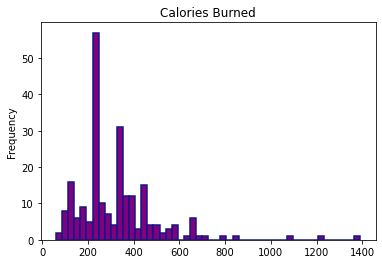

In [12]:
'''Next we can plot a histogram of the calorie observations. Bars are divided by the bin number. The range of the bars are
incremented by 50, the value of the bin. We can see see that a large portion of the calories burned are betwee 200-300 per run. 
We can also see how spread out the data is, which is an illustration of the high standard deviation. Also remeber
to include a semicolon at the end of any plot you have created. This is a remnant from programs like MATLAB where this stops
code from being printed along with the graph.'''

df['Calories'].plot.hist(title = 'Calories Burned', color='purple', edgecolor='#101883', linewidth = 1.5,bins = 50);

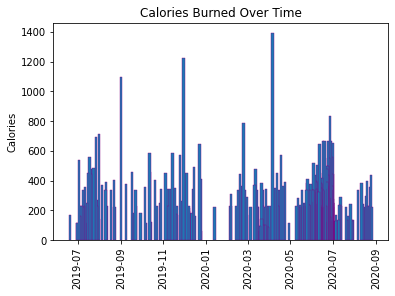

In [13]:
'''Next we can graph the calories burned over time to see if there is any visual pattern that we can spot for seasonality. 
We'll use Matplotlib's barchart to graph the data. To input the values to the chart, we need to pass in a list or 
NumPy array into the plt function. Selecting the DataFrame then using the dot values function will output a NumPy array of 
the data which is used to create the chart. Visually, there may be a pattern where the frequency of runs increase in the summer
time, around June to August, but we do not have enough observations to make such a conclusion.'''

plt.bar(x = df['Activity Date'].values, height = df['Calories'].values, width = 3.5, edgecolor = 'purple', linewidth = .4)
plt.xticks(rotation = 'vertical')
plt.title('Calories Burned Over Time')
plt.ylabel('Calories');

In [14]:
'''Say that we want to look at a time series of runs on a monthly basis, instead of a daily basis. To do this we can use the
resample function. First we set our Activity Date column to the index. You will now notice that if you run the DataFrame
instead of the "0, 1, 2" values for the index, we now have the date values as the index. Next we call the resample function.
We set it to one month and sum all the values within the month.'''

df.set_index('Activity Date', inplace = True)
df_monthly = df.resample('1M').sum()
df_monthly

'''Now we have a sum of all the columns. However, a few of the columns do not lend themselves to being summed. For instance
Max Speed cannot be summed, it's an average. Let's focus on just a few columns including: Elapsed Time, Distance and Calories.
We can modify the DataFrame to only hold those columns by using the below code.'''

df_monthly = df_monthly[['Elapsed Time','Distance in Kilometers','Calories']]

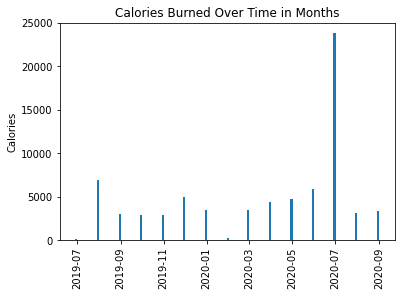

In [15]:
#Now let's graph out the calories again to look at how many are burned in total during each month. Again, there may be a 
#seasonal pattern, but our data set is to small to infer anthing

plt.bar(x = df_monthly.index.values, height = df_monthly['Calories'].values, width = 3.5)
plt.xticks(rotation = 'vertical')
plt.title('Calories Burned Over Time in Months')
plt.ylabel('Calories');

**To finish off our EDA, we will look at which variables have a linear correlation to Calories burned and which do not. For
anyone that wants to dig into the subject matter futher, [here is a link](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-trend-lines/v/fitting-a-line-to-data) to a series of Khan Academy videos on linear regression. pandas has a function corr which returns pairwise correlations when given a dependent variable. In this case, the dependent variable will be calories and the independent variables will be the rest of the variables.**

In [16]:
'''The output we get is very intuitive. The correlation between the distances run and calories burned is positive and almost
perfect. We can interpret this as the further the individual run, the more calories will be burned. Similarly, moving time is
also postively correlated to calories burned and is almost perfect. Again, this is very intuitive, the longer the runner spends
time moving during the run, we can expect that more calories will be burned. At the top of the list, the correlations are less
significant, meaning they may not be a great predictor of calories that will be burned. Keep in mind that this is just a simple
linear correlation, there may be non-linear correlations between calories burned and the variables that we do now know of.
Finally remember the saying, "correlation is not causation". We may have a good idea of what will burn calories, 
but we can never be totally certain.'''

print(df.corr()['Calories'].sort_values())

Elevation Low            -0.180177
Average Speed            -0.090543
Elevation High           -0.077017
Max Speed                 0.262089
Elevation Loss            0.489753
Elevation Gain            0.692365
Elapsed Time              0.892693
Moving Time               0.984005
Distance in Miles         0.998393
Distance in Kilometers    0.998393
Calories                  1.000000
Name: Calories, dtype: float64


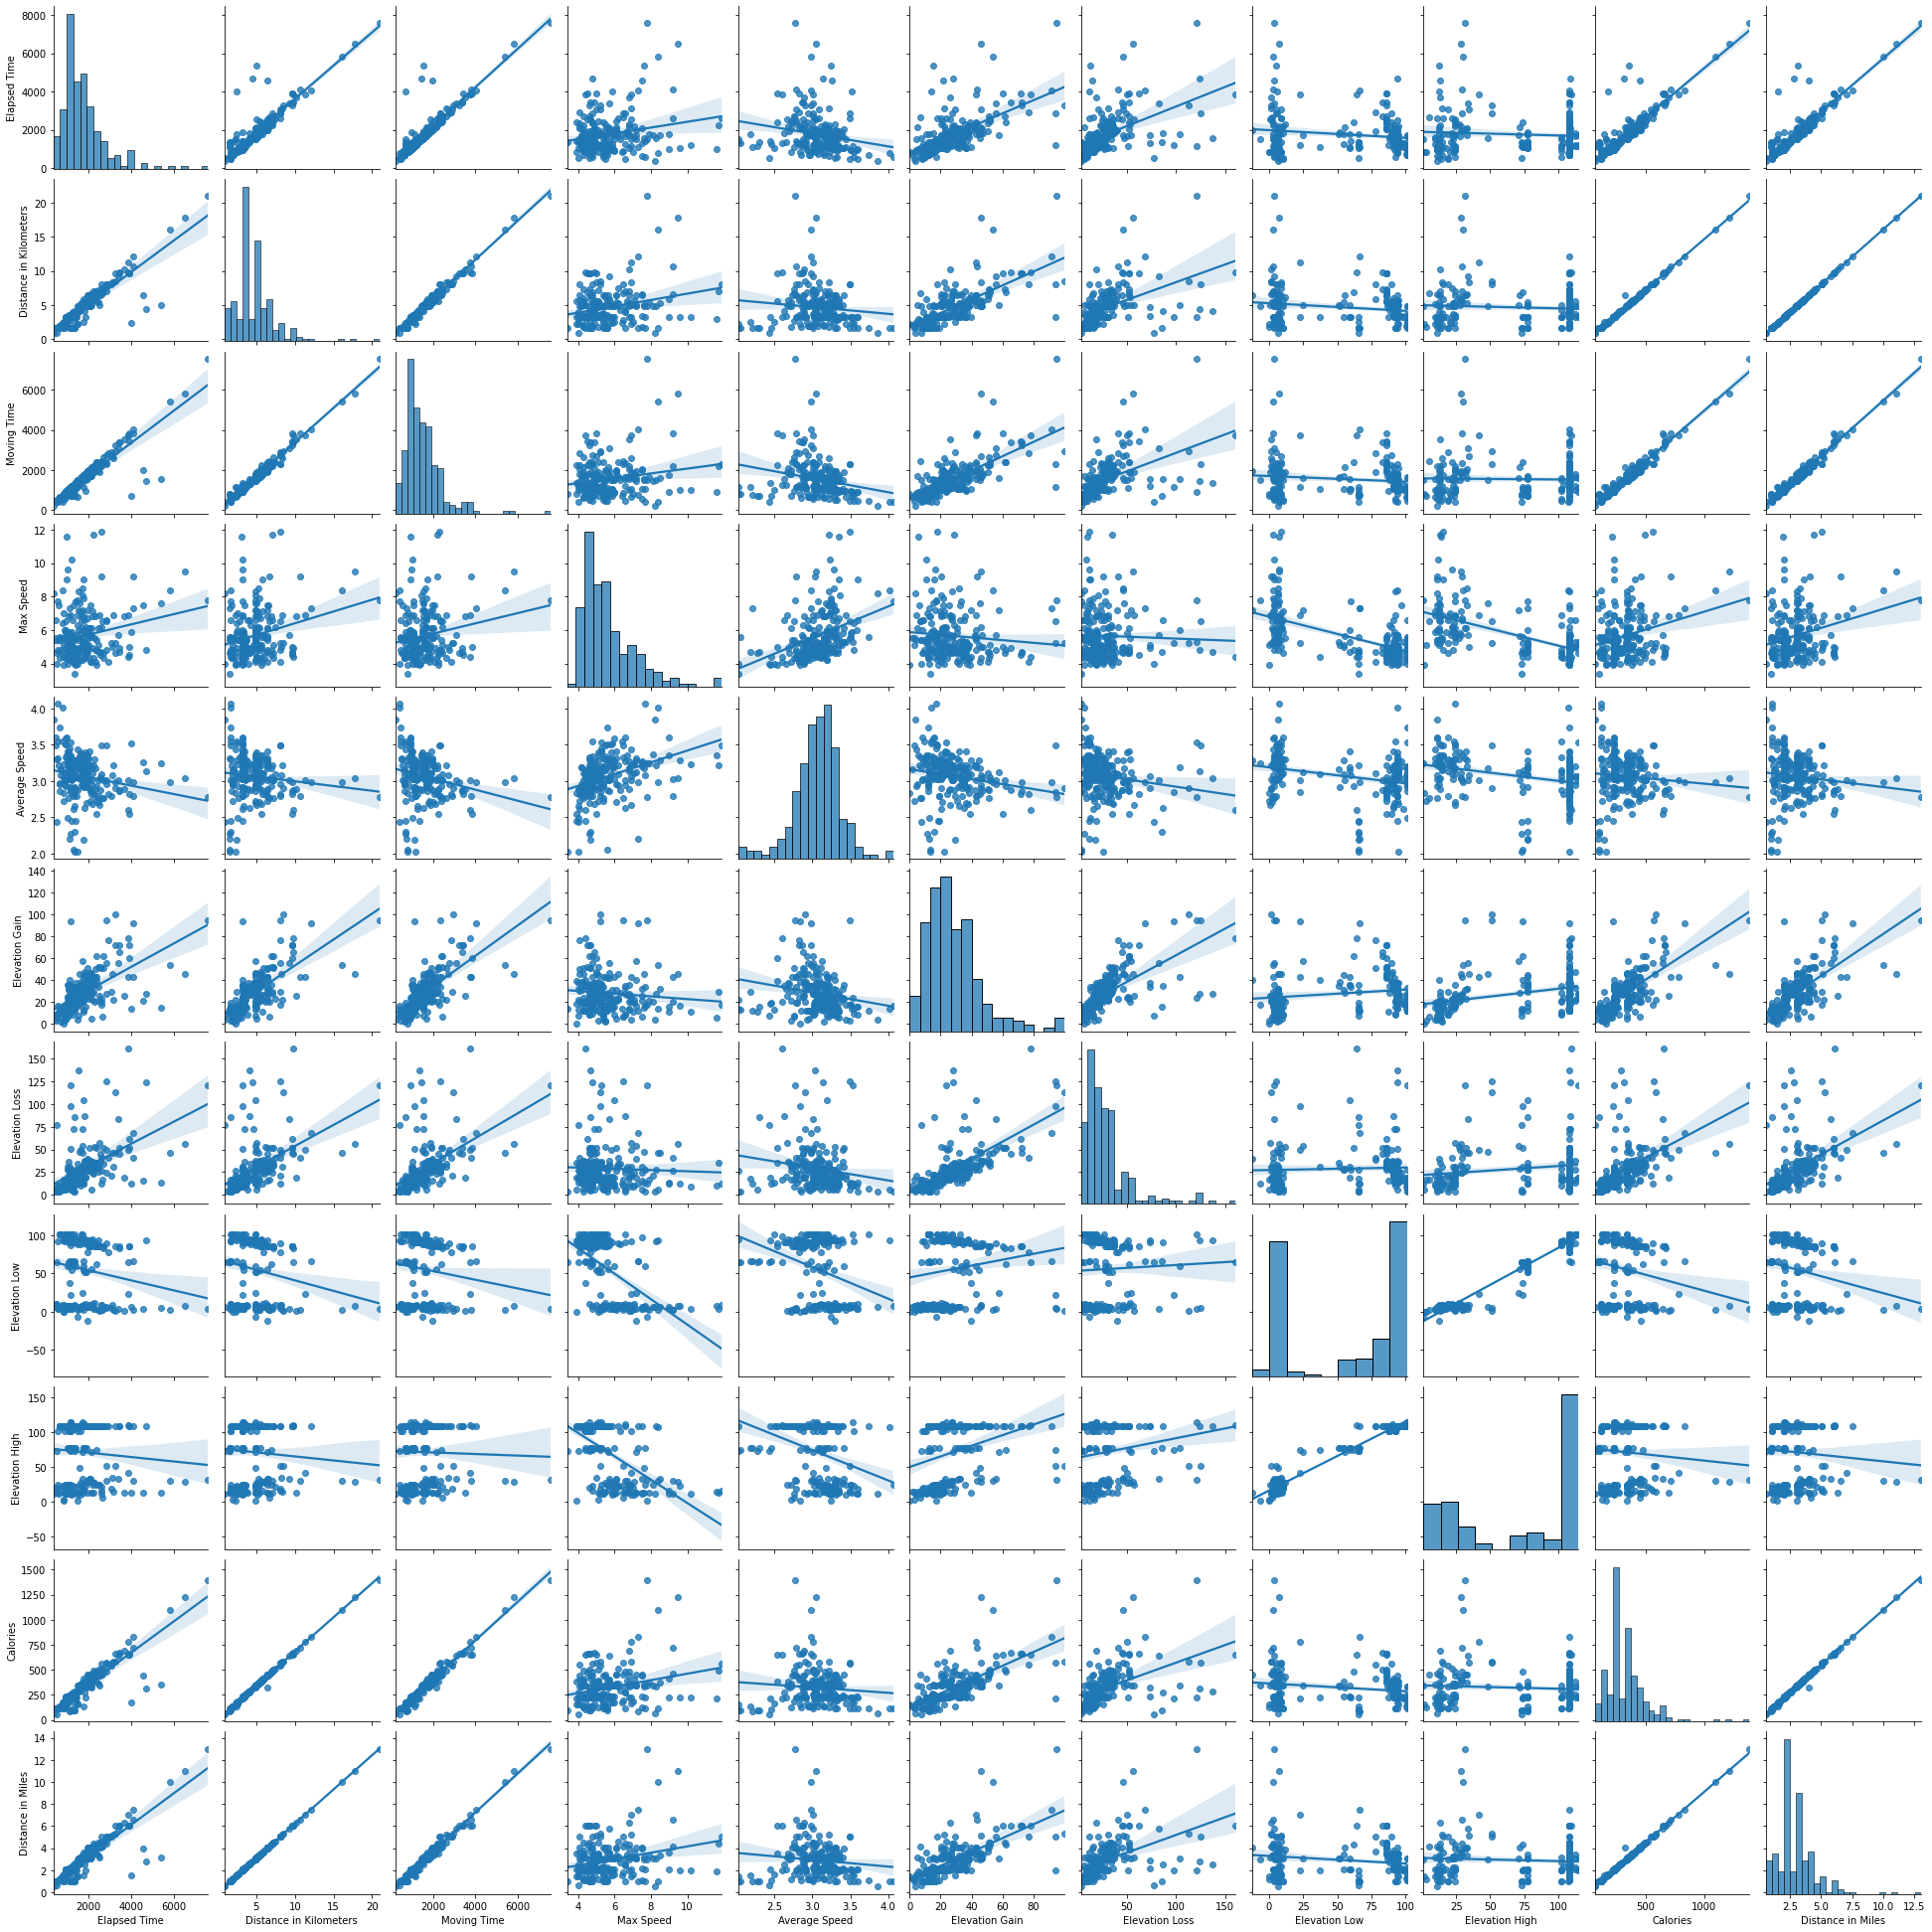

In [17]:
'''Finally, we will plot out the relationships between the variables. One of the best ways to graph the relationships is with
the Seaborn pairplot function. This returns scatter plots for all the variables. The kind parameter allows us to fit 
linear regression models to the scatter plots. If we take a look at calories which is the second row from the bottom, we can
see the relationships for each of the variables. Diagonally, histograms have been plotted to show the distribution of each of
the variables.'''

sns.pairplot(df, kind = 'reg');

In [18]:
df.to_csv('Run_Data.csv')

# <span style="color:purple">Additional Data Sets

**Also included within the folder are additional data sets.**

- **The Titanic file contains a well known data set on Titanic passengers. The data set is used for an intoduction to data analysis and machine learning on Kaggle. I highly encourage everyone to check out the site, you can follow the [link here!](https://www.kaggle.com/c/titanic)**
<pre></pre>
- **The Video Game Sales file contains information on the total sales for individual games such as Super Mario Bros. and Call of Duty: Modern Warfare. It's a relatively simple data set, but it's fun to explore with pandas! A link to the data set online can be found [here](https://data.world/julienf/video-games-global-sales-in-volume-1983-2017)**

# <span style="color:purple">Resources to learn more about pandas!

## <span style="color:blue">Documentation
[pandas Documentation Site](https://pandas.pydata.org/pandas-docs/stable/index.html)

## <span style="color:blue">Podcasts
1. [Real Python Podcast – Episode 16 – Thinking in Pandas: Python Data Analysis the Right Way](https://www.youtube.com/watch?v=NOBn8r5t5A4) (Optimizing pandas)

2. [Podcast._ _init_ _ - Wes McKinney's Career In Python For Data Analysis - Episode 203
](https://www.pythonpodcast.com/wes-mckinney-python-for-data-analysis-episode-203/)(Interview with the creator of pandas, Wes McKinney)

## <span style="color:blue">Videos
1. [Code Basics - Introductory Tutorials to pandas](https://www.youtube.com/watch?v=CmorAWRsCAw&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy) (Basic pandas functions including how to read csv files to a DataFrame, using functions such as "concat" and "dropna" and time series analysis)

2. [Bryan Cafferky Python Playlists](https://www.youtube.com/c/BryanCafferky/playlists)    (Covers using Python and pandas for data science. More advanced topics include calling SQL within pandas and working with Databricks)

## <span style="color:blue">Articles
    
   1. [Apache Arrow and the "10 Things I Hate About pandas"](https://wesmckinney.com/blog/apache-arrow-pandas-internals/)(Article penned by pandas creator We McKinney on what improvements should be tackled within pandas, including scalability issues, dealing with missing data and supporting categorical data)